In [622]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
iris = datasets.load_iris()

In [16]:
print(type(iris))
print()
print(iris)

<class 'sklearn.utils.Bunch'>

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
   

In [471]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [472]:
df.shape

(150, 5)

In [374]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [375]:
df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [473]:
X = df.drop('species', axis=1)
y = df['species']

In [378]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# SVM with a linear kernel

### The main parameters in a SVC class that we are going to work with are C, kernel, degree & gamma.

In [115]:
c = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.]
c_scores = []

for c_reg in c:
    svc = SVC(kernel='linear', C=c_reg)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    c_scores.append(scores.mean())

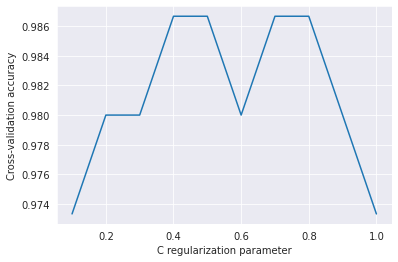

In [117]:
plt.plot(c, c_scores)
plt.xlabel('C regularization parameter')
plt.ylabel('Cross-validation accuracy')
plt.show()

### After additional parameter tweaking we found that .36 for C is the best one.

In [104]:
svc = SVC(kernel='linear', C=.36)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9933333333333334


# SVM with a polynomial kernel

In [56]:
poly_degree = 6
d_scores = []

for d in range(1, poly_degree + 1):
    svc = SVC(kernel = 'poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())

Text(0, 0.5, 'Cross-validation accuracy')

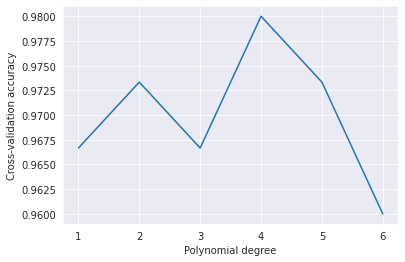

In [57]:
plt.plot(range(1, poly_degree + 1), d_scores)
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validation accuracy')

In [143]:
c = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
c_scores = []

for c_reg in c:
    svc = SVC(kernel='poly', degree=4, C=c_reg)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    c_scores.append(scores.mean())

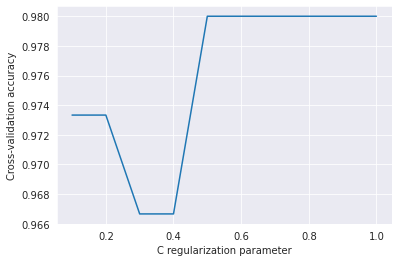

In [144]:
plt.plot(c, c_scores)
plt.xlabel('C regularization parameter')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [142]:
svc = SVC(kernel='poly', degree=4, C=.475)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9800000000000001


In [168]:
gamma = np.linspace(.01, .75, 50)
g_scores = []

for g in gamma:
    svc = SVC(kernel='poly', degree=4, C=.475, gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    g_scores.append(scores.mean())

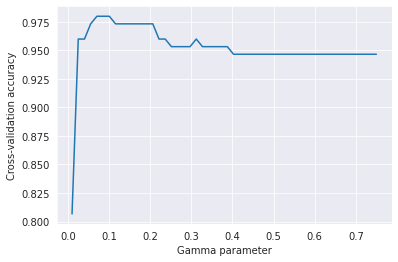

In [169]:
plt.plot(gamma, g_scores)
plt.xlabel('Gamma parameter')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [167]:
svc = SVC(kernel='poly', degree=4, C=.475, gamma=.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9800000000000001


# SVM with an rbf kernel

In [208]:
c = np.linspace(0.1, 2.5, 250)
c_scores = []

for c_reg in c:
    svc = SVC(C=c_reg)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    c_scores.append(scores.mean())

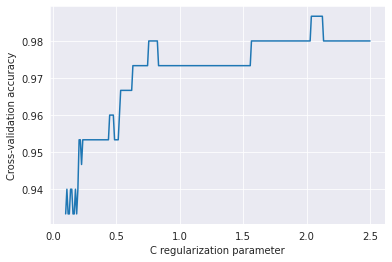

In [209]:
plt.plot(c, c_scores)
plt.xlabel('C regularization parameter')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [206]:
gamma = np.linspace(.01, 2, 250)
g_scores = []

for g in gamma:
    svc = SVC(C=2.04, gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    g_scores.append(scores.mean())

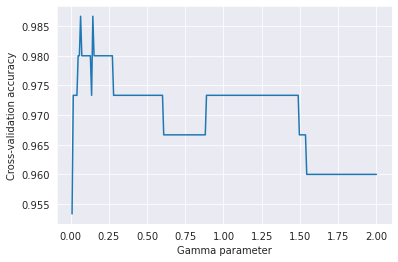

In [207]:
plt.plot(gamma, g_scores)
plt.xlabel('Gamma parameter')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [205]:
svc = SVC(C=2.04, gamma=.065)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9866666666666667


#### SVM (linear kernel) accuracy: 99.33%
#### SVM (polynomial kernel) accuracy: 98.00%
#### SVM (rbf/gaussian kernel) accuracy: 98.67%

# Gaussian Naive Bayes

In [534]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [536]:
for i in X:
    shapiro_wilk = shapiro(X[i])
    print(f'p-value ({i}): {shapiro_wilk[1]}')

p-value (sepal length (cm)): 0.01017984002828598
p-value (sepal width (cm)): 0.10113201290369034
p-value (petal length (cm)): 7.412849778454245e-10
p-value (petal width (cm)): 1.6802413682626138e-08


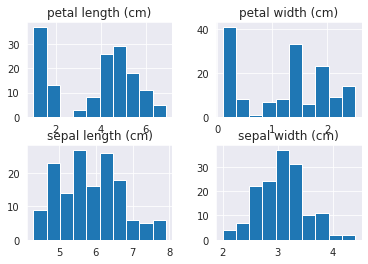

In [538]:
X.hist()
plt.show()

In [526]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9533333333333334


# Logistic Regression

In [613]:
c = range(0, 21)
c_scores = []

for c_reg in c:
    logreg = LogisticRegression(random_state=123, multi_class='multinomial', C=c_reg)
    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    c_scores.append(scores.mean())

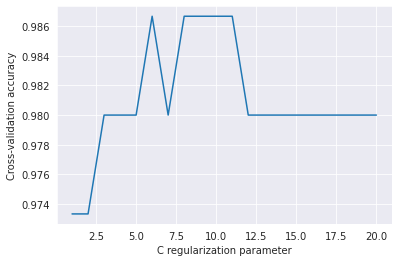

In [614]:
plt.plot(c, c_scores)
plt.xlabel('C regularization parameter')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [605]:
#L2 regularization
logreg = LogisticRegression(random_state=123, multi_class='multinomial', C=5.3)
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores.mean()

0.9866666666666667

In [608]:
#L1 regularization
logreg = LogisticRegression(random_state=123, multi_class='multinomial', C=5.3, solver='saga', penalty='l1')
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores.mean()

0.9800000000000001

# KNN

In [618]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [620]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [621]:
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [627]:
ns = range(7, 22)
n_scores = []

for n in ns:
    knn = KNN(n_neighbors=n)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    n_scores.append(scores.mean())

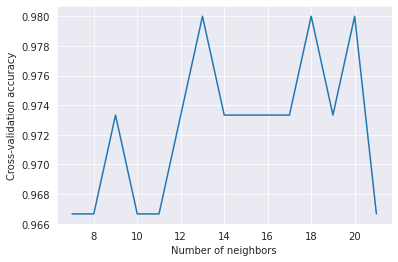

In [628]:
plt.plot(ns, n_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [629]:
knn = KNN(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.9800000000000001
